**Препроцесинг (попередня обробка) даних**  — це етап підготовки даних перед тим, як вони будуть використані в алгоритмах машинного навчання або аналітичних моделях. Цей процес полягає в очищенні, трансформації та форматуванні даних для того, щоб вони відповідали вимогам моделей машинного навчання і могли забезпечити точні та надійні результати.

1. Обробка аномалій та викидів в даних.  
2. Видалення та заповнення пропусків в даних:  
- 2.1. Заповнення пропусків в кількісних змінних.
- 2.2. Заповнення пропусків у категоріальних змінних.  
3. Перетворення даних:  
- 3.1. Перетворення категоріальних змінних у числовий формат для моделей машинного навчання.  
- 3.2. Масштабування (шкалювання) кількісних змінних. 

In [ ]:
import pandas as pd

# встановимо, що в числах типу float виводити 2 знаки після роздільника
pd.options.display.float_format = '{:.2f}'.format


df = pd.read_csv('students_survey.csv')
df.head()

Цей датасет представляє собою інформацію, зібрану в рамках опитування студентів технічних спеціальностей. Нижче наведено опис кожного стовпця датасету:  
- Age - Вік студента на момент збору даних.  
- Grade_level - Рік навчання студента на освітній програмі. Це категоріальне значення, яке може приймати такі значення:  
Freshman (перший курс),  
Sophomore (другий курс),  
Junior (третій курс),  
Senior (четвертий курс).  
- Study_hours_per_week - Кількість годин, витрачених студентом на навчання протягом тижня. Це кількісне значення з можливими значеннями від 5 до 40 годин.  
- Preferred_study_method - Обраний студентом метод навчання, може приймати такі варіанти:  
Lecture (лекції),  
Practical (практичні заняття),  
Self-study (самостійне навчання),  
Group-study (групове навчання).  
- Absent_days - Кількість днів, протягом яких студент був відсутній на заняттях поточного семестру. Це кількісне значення, що може варіюватися від 0 до 15 днів. 
- Math_test_score - Середній бал студента з математичних предметів. Це кількісне значення, яке варіюється від 50 до 100 балів.  
- Extracurricular_participation - Участь студента в позанавчальних активностях. Це категоріальне значення з можливими варіантами "Yes" (так) або "No" (ні).  
- Preferred_language - Обрана студентом мова програмування для виконання проектних робіт. Можливі варіанти:  
Python,  
C++,  
Java,
R.  
- Satisfaction_level - Рівень задоволеності студентом навчальними приміщеннями, виражений у відсотках. Це кількісне значення в діапазоні від 50% до 100%.  
- Future_plans - Плани студента після закінчення навчання, може містити такі варіанти:  
Higher education (продовження навчання),  
Employment (працевлаштування),  
Freelancing (фріланс),  
Undecided (не визначився).  

In [ ]:
df.info()

**Довідково: Що таке кількісні (числові) та категоріальні змінні?**    
1. Кількісні змінні — це змінні, які приймають числові значення, що виражають кількість або результат вимірювання. Вони використовуються для опису величин, які можна виміряти або порахувати.  
2. Категоріальні змінні (часто задаються в датасеті у вигляді тексту) — це змінні, які приймають значення, що належать до певних категорій або груп. Ці значення не можна порахувати або виміряти як кількість, але їх можна класифікувати або розділити на групи.  

  **Відмінності між кількісними та категоріальними змінними**
| Характеристика   | Кількісні змінні                                  | Категоріальні змінні                             |
|------------------|--------------------------------------------------|--------------------------------------------------|
| **Тип даних**    | Числові (дискретні або неперервні)               | Категорії (номінальні або порядкові)             |
| **Приклад**      | Вік, зарплата, час, кількість студентів          | Стать, рівень освіти, місто проживання           |
| **Вимірюваність**| Можна виміряти або порахувати                    | Не можна виміряти, але можна класифікувати       |
| **Операції**     | Можна виконувати арифметичні операції (додавання, віднімання) | Можна лише класифікувати або впорядковувати      |


### 1. Обробка аномалій та викидів у даних  
Аномалії або викиди в даних — це значення, які суттєво відрізняються від решти спостережень. Їх наявність може вплинути на якість аналізу або моделі машинного навчання, оскільки вони можуть спотворити статистику або результати прогнозування. Тому важливо виявити такі аномалії та прийняти рішення щодо їх обробки: видалення або заміни.

**Виявлення аномальних значень**  
**1.1.** Одним із найпростіших методів для виявлення аномалій — це описова статистика, яка дозволяє отримати базову інформацію про розподіл даних. Для цього використовується метод describe() у Pandas.

In [ ]:
df.describe()

- Необхідно проаналізувати максимальні та мінімальні значення кожної змінної.
- Якщо аналізовані значення виглядають цілком природньо і логічно, то можна зробити висновок, що викиди відсутні.  
- Якщо в даних виявлено екстремально низьке або високе знчення - варто провести додатковий аналіз та у разі потреби видалити викиди.

**1.2.** Додатково ще одним простим та інформативним способом для виявлення викидів є аналіз екстремально низьких та високих значень. Для цього можна написати коротку власну функцію.  
_Примітка: процентилі або квантилі — це значення, що розділяють дані на частини. Наприклад, 1%-й процентиль означає, що 1% даних знаходяться нижче цього значення, а 99%-й процентиль — що 99% даних знаходяться нижче цього значення._  

In [ ]:
#імпорт бібліотеки numpy для роботи з числовими масивами
import numpy as np

def extreme_values_summary(df):
    """
    Для кожної числової колонки виводить:
    - мінімум
    - 1% процентиль
    - 99% процентиль
    - максимум
        """
    num_cols = df.select_dtypes(include=[np.number]).columns #відбираємо тільки числові змінні
    summary = {}

# в кожному стовпчику видаляємо пропуски, розраховуємо 1%-ий та 99%-ий процентилі
    for col in num_cols:
        col_data = df[col].dropna()
        q01 = col_data.quantile(0.01)
        q99 = col_data.quantile(0.99)
        

# зводимо разом результати, отримані для кожного стовпчика 
        summary[col] = {
            "min": col_data.min(),
            "1%": q01,
            "99%": q99,
            "max": col_data.max(),
                    }

    return pd.DataFrame(summary).T

extreme_values_summary(df) #виклик функції

Якщо мін/макс значення суттєво відрізняються від 1%/99% — це сигнал, що є аномальні значення.

**1.3. Видалення викидів**  
Простим але досить ефективним є метод видалення викидів за допомогою квантилів або ж на основі процентилів:   
- Квантилі або процентилі — це значення, що розділяють дані на частини. Наприклад, 1%-й квантиль означає, що 1% даних знаходяться нижче цього значення, а 99%-й квантиль — що 99% даних знаходяться нижче цього значення.  
- У цьому методі обчислюється нижній (як правило 1% або 5%) та верхній (як правило 95% або 99%) квантилі для певної кількісної змінної.  
- Після цього дані фільтруються таким чином, щоб залишити лише ті значення, які знаходяться в діапазоні між цими квантилями, тобто між 1%-м і 99%-м процентилями. Це означає, що видаляється 1% найменших і 99% найбільших значень (викидів).

<span style="color:red"> Чому при видалені викидів варто обрати саме 99%, а не 95%</span>
- 95% процентилі обрізають значно більше даних.
- 99% процентилі (1%–99%) — це більш "щадний" підхід: він відкидає лише 2% даних (по 1% з кожного боку). Це означає, що ми дивимося лише на найбільш екстремальні значення, і з меншою вірогідністю видалимо важливу інформацію.  
- У задачах препроцесингу даних нам важливо не відкидати корисні спостереження, а саме знайти аномалії.  
**Тобто 99% — це баланс між "захопити всі нормальні випадки" і "видалити найекстремальніші дані".**

In [ ]:
import numpy as np
# видалимо викиди в стовпчику Age
column = 'Age'
# Обчислюємо 1% та 99% процентилі
lower_bound = df[column].quantile(0.01)
upper_bound = df[column].quantile(0.99)

# Фільтруємо дані з урахуванням пропусків (NaN)
df_cleaned = df[((df[column] >= lower_bound) & (df[column] <= upper_bound)) | (df[column].isna())]

# Перевіряємо розмір нового DataFrame після видалення викидів
print(f'Кількість рядків після видалення викидів для стовпця {column}: {df_cleaned.shape[0]}')

# Виводимо описову статистику, щоб побачити результат
df_cleaned.describe()

In [ ]:
#повертаюся до назви датафрейму df
df = df_cleaned.copy()
df.info()

### 2. Видалення та заповнення пропусків в даних:  
 
З попередніх лекцій:  
**df.dropna()** - видалити рядки, в яких є пропуски  
**df.fillna()** - заповнити рядки, в яких є пропуски вказаною інформацією  
  
**Деякі базові стратегії заповнення пропущених значень:**  
- Медіана або середнє значення: Замінює пропущені значення середнім або медіанним значенням стовпця. Застосовується для числових стовпців.    
- Мода: Заповнення пропусків найпопулярнішим значенням у стовпці. Зазвичай застосовується до категоріальних стовпців.    
- Нова категорія (для категоріальних даних). Замінює пропуски в даних новою ктегорією (н-клад, Other, Not given  і т.д.)

<span style="color:red"> **!!!**</span> Кожна стратегія має свої переваги та недоліки, і вибір методу повинен бути спрямований на особливості набору даних та конкретні вимоги аналізу або моделювання. Крім того, важливо врахувати потенційний вплив заповнення на цілісність та вірогідність даних.  
<span style="color:red">**!!!**</span> Немає однозначної відповіді на питання про те, який відсоток пропущених значень є прийнятним для заповнення, оскільки це залежить від конкретного дослідження та його вимог. Ви можете провести експерименти з різними відсотками заповнення та оцінити, як це впливає на результати вашого аналізу або моделі.

Отже, є пропуски в:  
- стовпчиках з кількісними даними: **Age, Study_hours_per_week**  
- стовпчиках із категоріальними даними: **Grade_level, Preferred_language**   

<span style="color:red"> **Автоматизація процесу заповнення пропусків**</span>  
Imputer (в бібліотеці scikit-learn реалізований як SimpleImputer) — це інструмент для автоматизованого заповнення пропусків у даних (NaN). Він дозволяє задати правило, за яким усі пропуски в стовпці будуть замінені одним значенням. Це спрощує обробку датасетів та зменшує втрату інформації.  
У загальному вигляді синтаксис можна подати так:  
```
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="...", fill_value=...)
df[cols] = imputer.fit_transform(df[cols])
```
- strategy — визначає правило, за яким заповнюються пропуски.
- fill_value — використовується, якщо вибрана стратегія "constant".

**Варіанти стратегії strategy**  
- "mean" — середнє значення (для числових даних).  
- "median" — медіана (для числових даних, стійка до викидів).  
- "most_frequent" — найчастіше значення (працює і для числових, і для категоріальних).  
- "constant" — довільне фіксоване значення, яке задається параметром fill_value.

In [ ]:
# Вибираємо кількісні змінні (числові стовпці)
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Вибираємо категоріальні стовпці
categorical_columns = df.select_dtypes(include=['object']).columns

**3.1. Заповнення пропусків в кількісних змінних.**    
Спочатку опрацюємо пропуски в числових даних, заповнивши їх медіанним значенням

In [ ]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = num_imputer.fit_transform(df[numeric_columns])

**3.2. Заповнення пропусків в категоріальних змінних.**  
Далі заповнимо пропуски в категоріальних даних значеннями нової категорії Not given  

In [ ]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='Not given')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

In [ ]:
df.info()

**Коли краще видалити, а не заповнити пропуски в даних?**  
- Якщо пропусків менше ніж 5-10%, їх часто можна безпечно заповнити.
- Якщо пропусків більше 30-40%, варто серйозно розглянути можливість видалення стовпця.
- Видаляйте стовпчики з пропусками, якщо їх важко заповнити логічно (н-клад, пропуски в змінних типу "Улюблений фільм" або "Улюблений колір" можуть бути складними для заповнення і краще просто видалити стовпчик).  

### 4. Перетворення даних  
Перетворення даних перед застосуванням моделей машинного навчання є важливим етапом препроцесингу, оскільки більшість алгоритмів працюють лише з числовими даними або потребують відшкальованих вхідних ознак. Перетворення даних допомагає покращити інтерпретацію результатів і забезпечити кращу узгодженість та точність прогнозів машинного навчання.  

  Для подальшої роботи варто окремо відібрати категоріальні та кількісні змінні:

In [ ]:
# Вибираємо категоріальні стовпці
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# Вибираємо кількісні ознаки (числові стовпці)
numeric_columns = df.select_dtypes(include=[float, int]).columns

#### 4.1. Перетворення категоріальних змінних у числовий формат для моделей машинного навчання.  
Більшість алгоритмів машинного навчання працюють лише з числовими даними, тому необхідно перетворювати категоріальні змінні на числові значення.  
Розглянемо один із найпоширеніших методів перетворення категоріальних змінних у числовий формат - **унітарне кодування більш відоме як One-Hot Encoding**  
One-Hot Encoding перетворює кожну категорію на окремий бінарний стовпчик. Для кожного рядка у відповідному стовпчику буде 1, якщо рядок належить до цієї категорії, і 0, якщо ні. 
Наприклад, для змінної "Grade_level" зі значеннями ["Freshman", "Sophomore", "Junior", "Senior"], One-Hot Encoding створить такі стовпчики:  
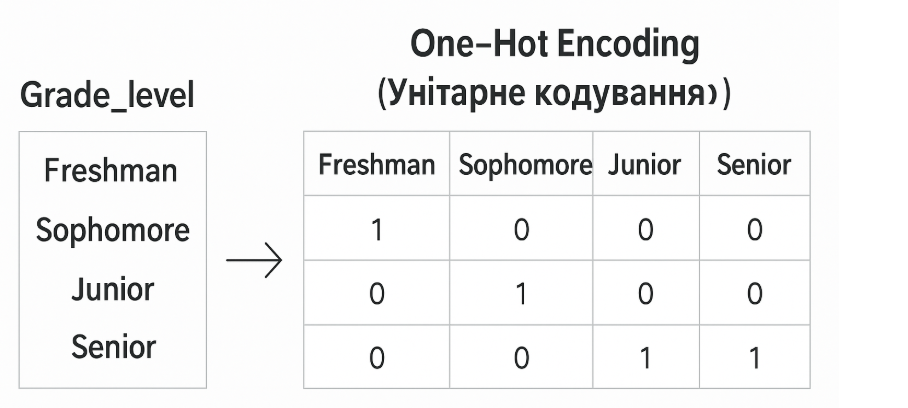

In [ ]:
# імпортуємо клас OneHotEncoder з бібліотеки sklearn, який дозволяє перетворювати категоріальні змінні в числові
from sklearn.preprocessing import OneHotEncoder

# Ініціалізуємо OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
'''sparse_output=False: Встановлює повернення щільної матриці (звичайний 2D масив), а не розрідженої (спрощує обробку).
drop='first': Видаляє перший стовпець для кожної категоріальної змінної, щоб уникнути дублювання інформації. 
Наприклад, якщо змінна Grade_level має 4 категорії, One-Hot Encoding створить лише три бінарних стовпчики, а не чотири.'''

# Застосовуємо OneHotEncoder до категоріальних стовпців
encoded_columns = encoder.fit_transform(df[categorical_columns])

# Створюємо новий DataFrame з перекодованими змінними і назвами колонок
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Об'єднуємо початковий DataFrame з новими перекодованими стовпцями
df = df.drop(columns=categorical_columns)  # Видаляємо оригінальні категоріальні стовпці
df = pd.concat([df, encoded_df], axis=1)

# Перевіряємо результати
print(df.head())

### 4.2. Масштабування (шкалювання) кількісних змінних.

Масштабування даних  — це перетворення числових ознак у такий вигляд, щоб вони мали однаковий масштаб (діапазон значень).
Головна мета масштабування — зробити так, щоб усі змінні однаково впливали на модель і жодна не «домінувала» лише через великі числові значення.  
Наприклад: якщо в датасеті є дві ознаки — “Вік” (18–70) і “Зарплата” (10 000–200 000), то алгоритм може приділяти зарплаті значно більше ваги, ніж віку. Масштабування розв’язує цю проблему.  
**Масштабування даних може допомогти покращити якість моделі, зменшити вплив викидів і гарантувати, що дані матимуть однаковий масштаб.**  
   
**Чому ми повинні масштабувати ознаки?**

Деякі алгоритми машинного навчання чутливі до масштабу ознак, а інші  - практично ні. Наприклад:  
**1. Алгоритми на основі градієнтного спуску**
Алгоритми машинного навчання, такі як лінійна регресія, логістична регресія, нейронна мережа, PCA (аналіз головних компонентів) тощо, які використовують градієнтний спуск як метод оптимізації, потребують масштабування даних.  
**2. Алгоритми на основі відстані**
Масштаб ознак найбільше впливає на такі алгоритми, що грунтуються на розрахунку відстаней, як KNN, кластеризація K-середніх і SVM. 

**3. Алгоритми дерева рішень та випадкового лісу**  
Дані алгоритми є досить нечутливими до масштабу ознак.

**Найчастіше в машинному навчанні використовують такі методи масштабування:**  
- Мін–макс нормалізація (нормалізація в діапазон 0–1).  
- Стандартизація (центрування даних навколо середнього значення з масштабуванням до стандартного відхилення 1).  
- Інші методи: масштабування робастне до викидів (RobustScaler), логарифмічне перетворення тощо.  

У цій лекції ми розглянемо лише стандартизацію, оскільки вона добре підходить для масштабування більшості даних та часто використовується в практиці.  
Стандартизація — це перетворення даних так, щоб середнє значення ознаки дорівнювало 0, а стандартне відхилення дорівнювало 1.  
| Вік (роки) | Зарплата (\$) | Вік (стандартиз.) | Зарплата (стандартиз.) |
| ---------- | ------------- | ----------------- | ---------------------- |
| 20         | 10 000        | -1.20             | -1.10                  |
| 35         | 25 000        | -0.10             | -0.60                  |
| 50         | 50 000        | 1.00              | 0.00                   |
| 65         | 120 000       | 2.30              | 1.70                   |


In [ ]:
#імпортуємо клас StandardScaler з sklearn, який використовується для стандартизації даних
from sklearn.preprocessing import StandardScaler

# Ініціалізуємо StandardScaler
scaler = StandardScaler()

# Стандартизуємо кількісні ознаки
standardized_columns = scaler.fit_transform(df[numeric_columns])

# Перетворюємо стандартизовані дані в DataFrame з відповідними назвами стовпців
standardized_df = pd.DataFrame(standardized_columns, columns=numeric_columns, index=df.index)

# Видаляємо початкові кількісні ознаки
df = df.drop(columns=numeric_columns)

# Додаємо стандартизовані ознаки назад до DataFrame
df = pd.concat([df, standardized_df], axis=1)

# Перевіряємо результат
print(df.head())

In [ ]:
df.info()